# Inferial Statistics

tujuannya adalah mengambil sample yang lebih besar dari suatu populasi untuk dapat digeneralisasi

## Random Variable
- Discrete

Variable yang hanya mengambil sejumlah nilai yang berbeda yang dapat dihitung sehingga demikian dapat dikuantifikasi.

contoh : Bernaulli distribution, Poison distribution, Binomial distribution


- Continuous

Variable yang mengambil sejumlah nilai yang tidak terbatas



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(5,5)})

from IPython.display import Math, Latex
from IPython.core.display import Image

## Uniform Distribution

In [17]:
from scipy.stats import uniform # <-- modul untuk uniform distribution

In [24]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

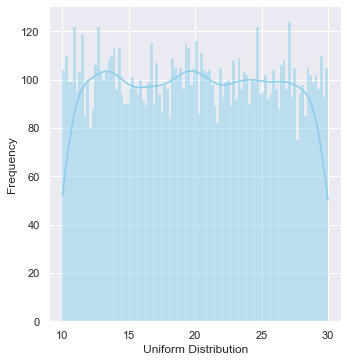

In [25]:
ax = sns.displot(
    data_uniform,
    bins = 100,
    kde=True,
    color="skyblue",
    alpha=0.5,
    linewidth=0.1
)
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')
plt.show()

## Normal Distribution

In [19]:
from scipy.stats import norm # <-- modul untuk normal distribution

In [31]:
data_normal = norm.rvs(size=100000, loc=0, scale=1)

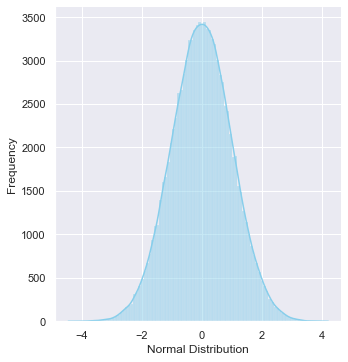

In [36]:
ax = sns.displot(
    data_normal,
    bins = 100,
    kde=True,
    color="skyblue",
    alpha=0.5,
    linewidth=0.1
)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

## Gamma Distribution

In [37]:
from scipy.stats import gamma # <-- modul untuk gamma distribution

In [38]:
data_gamma = gamma.rvs(a=5, size=10000)

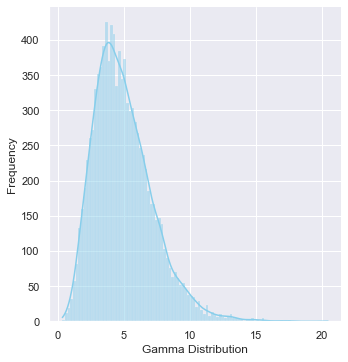

In [39]:
ax = sns.displot(
    data_gamma,
    bins = 100,
    kde=True,
    color="skyblue",
    alpha=0.5,
    linewidth=0.1
)
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')
plt.show()

## Exponential Distribution

In [41]:
from scipy.stats import expon # <-- modul untuk exponential distribution

In [44]:
data_expon = expon.rvs(size=1000, loc=0, scale=1)

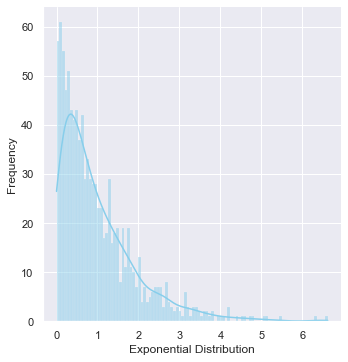

In [45]:
ax = sns.displot(
    data_expon,
    bins = 100,
    kde=True,
    color="skyblue",
    alpha=0.5,
    linewidth=0.1
)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')
plt.show()

## Poison Distribution

In [46]:
from scipy.stats import poisson # <-- modul untuk poisson distribution

In [47]:
data_poisson = poisson.rvs(mu=3, size=10000)

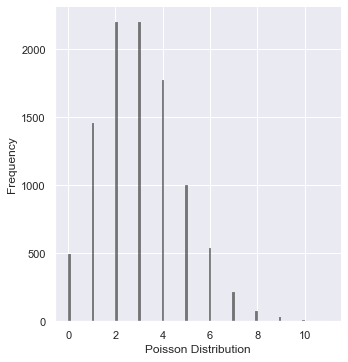

In [50]:
ax = sns.displot(
    data_poisson,
    bins = 100,
    kde=False,
    color="black",
    alpha=0.5,
    linewidth=0.1
)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
plt.show()

## Binomial Distribution

In [51]:
from scipy.stats import binom # <-- modul untuk binomial distribution

In [52]:
data_binom = binom.rvs(size=10000, n=10, p=0.8)

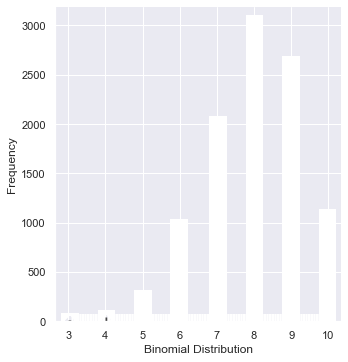

In [55]:
ax = sns.displot(
    data_binom,
    bins = 100,
    kde=False,
    color="black",
    alpha=0.7,
    linewidth=15
)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

## Bernoulli Distribution

In [56]:
from scipy.stats import bernoulli # <-- modul untuk bernoulli distribution

In [59]:
data_bernoulli = bernoulli.rvs(size=10000, p=0.6)

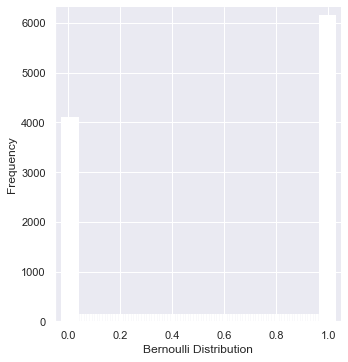

In [60]:
ax = sns.displot(
    data_bernoulli,
    bins = 100,
    kde=False,
    color="black",
    alpha=0.7,
    linewidth=15
)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')
plt.show()

## Confidence Interval

mengukur seberapa akurat nilai Mean sebuah sample terhadap nilai Mean populasi sesungguhnya (tujuannya adalah manage expectation)

cara hitung CI adalah dengan:

1.Best Estimate += Margin of Error

2.Margin of Error = z * SE (Standar Error )

3.z didapat dari % keyakinan (% confidence)

- 75% yakin, z = 1.15
- 90% yakin, z = 1.64
- 95% yakin, z = 1.96
- 97% yakin, z = 2.17
- 99% yakin, z = 2.57
- 99.90% yakin, z = 3.29

menghitung CI dengan mean :
1. SE = std / sqrt(n)
2. Best Estimate = mean

menghitung CI dengan population proportion
1. SE = sqrt(pop_prop * (1-pop_prop) / n)
2. Best Estimate = population proportion

In [61]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('Data/heart.csv')

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
df['Sex1'] = df['sex'].replace({1:'Male', 0:'Female'})

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [71]:
dx = df[["target", "Sex1"]].dropna() # <-- drop semua kolom kecuali kolom target dan Sex1
dx.head()

,target,Sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female


In [73]:
pd.crosstab(dx['target'], dx['Sex1'])

#crosstab --> Compute a simple cross tabulation of two (or more) factors

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [74]:
n_female = 86+226

In [75]:
prop_female_jantung = 226/n_female

In [76]:
se_female = np.sqrt(prop_female_jantung * (1-prop_female_jantung) / n_female)

In [77]:
se_female

0.02529714756803247

In [78]:
#Hitung CI dengan keyakinan 95% so z adalah 1.96
z_score = 1.96
moe_female = z_score * se_female
moe_female

0.049582409233343644

In [79]:
(prop_female_jantung - moe_female, prop_female_jantung + moe_female)

(0.6747765651256307, 0.773941383592318)

kesimpulan : kita yakin 95% bahwa 67%-77% perempuan dengan sakit jantung

In [81]:
##cara lain dengan menggunakan statmodels
import statsmodels.api as sm


sm.stats.proportion_confint(n_female * prop_female_jantung, n_female)

(0.6747774762140357, 0.773940472503913)

## CI of Mean

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [83]:
# berapa rata-rata tingkat cholesterol female?

In [89]:
df.groupby('Sex1')['chol'].mean()

Sex1
Female    261.455128
Male      239.237027
Name: chol, dtype: float64

In [92]:
df.groupby('Sex1')['chol'].agg(['mean', 'std', 'count'])

,mean,std,count
Sex1,,,
Female,261.455128,64.466781,312
Male,239.237027,43.155535,713


In [96]:
mean_fe = 261.45
n_fe = 312
std_fe = 64.4
z = 1.96 # <-- confidence level 95%

In [97]:
#standard error
se_fe = std_fe / np.sqrt(n_fe)
se_fe

3.6459320499455985

In [98]:
(mean_fe - z*std_fe, mean_fe + z*std_fe)

(135.226, 387.674)

## Contoh lain CI

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize': (13,7.5)})
sns.set_context('talk')

In [101]:
np.random.seed(42)
normal_us_male_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_us_female_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass = np.concatenate((normal_us_male_pounds, normal_us_female_pounds), axis=0)
df_mass = pd.DataFrame(data={'us_people_pounds': all_mass})

In [102]:
df_mass

,us_people_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319
...,...
12495,120.060669
12496,152.223744
12497,148.408843
12498,127.938558


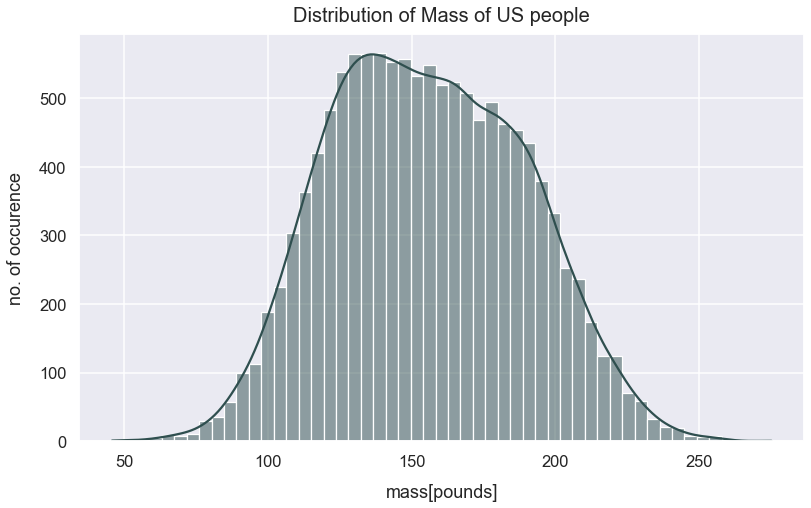

In [104]:
#seaborn plot
sns.histplot(
    df_mass['us_people_pounds'],
    kde=True,
    color="darkslategrey"
)

plt.xlabel("mass[pounds]", labelpad=14)
plt.ylabel("no. of occurence", labelpad=14)
plt.title("Distribution of Mass of US people", y=1.015, fontsize=20)

plt.show()

Distribusi kurang normal

In [105]:
#1 cari Mean
pop_mean = df_mass["us_people_pounds"].mean()
pop_mean

155.4232805942338

In [106]:
#2 cari standard deviation
pop_std = df_mass["us_people_pounds"].std()
pop_std

33.585190883958624

In [107]:
# ambil 300 sampel dari 25 random variable
sample_means = []
n = 25
for sample in range (0,300):
    sample_values = np.random.choice(a=df_mass['us_people_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
len(sample_means)
# sample_means

300

In [108]:
df_mass['us_people_pounds']

0        192.921140
1        177.681657
2        196.544525
3        217.552717
4        175.380319
            ...    
12495    120.060669
12496    152.223744
12497    148.408843
12498    127.938558
12499    106.530316
Name: us_people_pounds, Length: 12500, dtype: float64

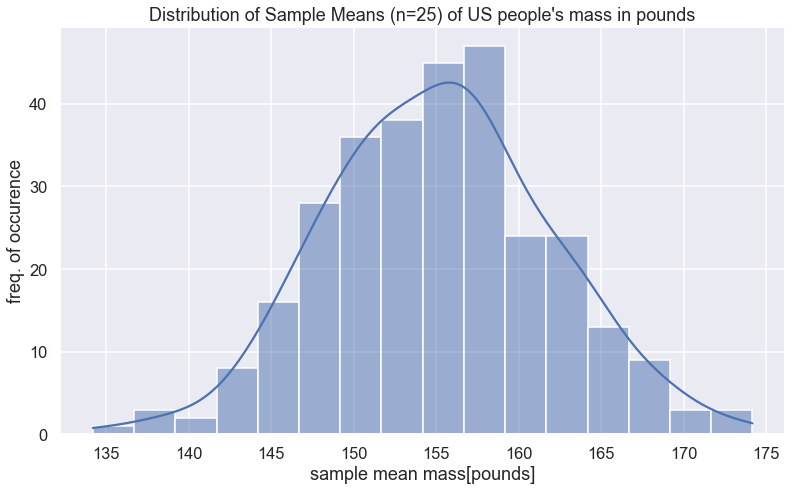

In [109]:
sns.histplot(
    sample_means, 
    kde=True
)

plt.title("Distribution of Sample Means (n=25) of US people's mass in pounds")
plt.xlabel("sample mean mass[pounds]")
plt.ylabel("freq. of occurence")

plt.show()

## Kalkulasi distribusi sampling

In [112]:
sample_median = np.median(sample_means)
sample_median

155.3008268518431

In [113]:
sample_mean = np.mean(sample_means)
sample_mean

155.12418330193915

In [115]:
sample_std = np.std(sample_means)
sample_std

6.734407481483423

In [116]:
# SE = std / sqrt(n)
# std diambil dari population
s_se = df_mass['us_people_pounds'].std() / np.sqrt(n)

# z_score adalah 1.96 untuk 95% yakin
z_score = 1.96

# margin of error adalah SE * z_score
s_moe = s_se * z_score

# best estimate adalah mean
(sample_mean - s_moe, sample_mean + s_moe)

(141.95878847542738, 168.28957812845093)

Kesimpulan : kita yakin 95% bahwa berat badan orang di US adalah sekitar 141 - 168 pounds

In [117]:
# untuk gambar graph normal distribution, dengan 95% probability di shade
# area di bawah buntut kiri dan kanan masing2 adalah 2.5% kemungkinan
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [118]:
1 - (tail * 2)

0.950004209703559

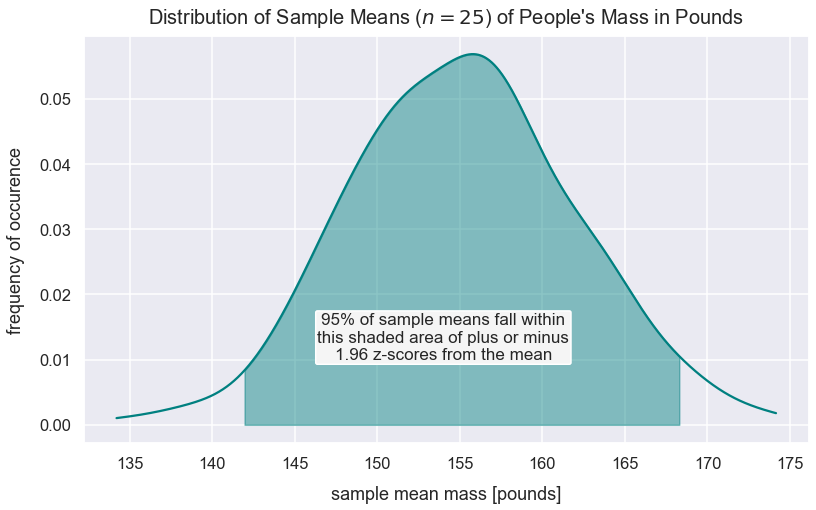

In [119]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)

plt.plot(
    pos,
    kde(pos), 
    color='teal'
)

shade = np.linspace(sample_mean - s_moe, sample_mean + s_moe, 300)
plt.fill_between(
    shade,
    kde(shade),
    alpha=0.45,
    color="teal"
)

plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

plt.text(
    x=154,
    y=.01, 
    horizontalalignment='center',
    fontsize=17, 
    s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean",
    bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1")
)

plt.show()

## Hypothesis Testing

hipotesis adalah jawaban sementara karena masih bersifat praduga yang perlu untuk diuji kebenarannya

hipotesis yang baik harus :
- include 'if' 'then'
- include both dependent and independent variable
- dapat dites dengan eksperimen
- berdasarkan informasi based on resarch
- punya design kriteria

null hypothesis adalah fakta yang selalu bisa diterima

significant level (alpha)
- umum --> 5%
- other --> sesuai target, misal 1% --> keyakinan kuat terhadap null hypothesis

## p-value vs alpha
- p-value < alpha => reject null hypothesis
- p-value >= alpha => FAIL reject null hypothesis

## Case Study - one population proportion¶

52% ortu percaya x

apakah saat ini makin banyak yang percaya x ?

x = remaja kurang tidur karena elektronik & media sosial

Population: ortu dengan remaja (usia 13-18) p = 0.52

- h1 p > 0.52 (semakin banyak ortu yang percaya x)

- h0 p <= 0.52 (sama aja/ semakin dikit ortu yang percaya x)

Data: 1018 orang, 56% percaya x

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
n = 1018
pnull = 0.52
phat = 0.56

In [6]:
print(("zstat", "p-value"))
sm.stats.proportions_ztest(phat * n, n, pnull, alternative="larger")

('zstat', 'p-value')


(2.571067795759113, 0.005069273865860533)

p value < alpha

0.005 < 0.05

kita bisa reject null hypothesis

h0 kita adalah p <= 0.52 (sama aja/ semakin dikit ortu yang percaya x)

kesimpulan: kemungkinan besar iya, sekarang lebih banyak ortu yang percaya x

## Contoh 2 : BMI pria sama BMI wanita berbeda secara signifikan atau tidak?

Population: orang dewasa di dataset NHANES (nhanes_2015_2016.csv) Parameter: BMI pria, BMI wanita

h1 BMI pria = BMI wanita

h0 BMI pria (u2) != BMI wanita (u1)

Data :
- 2976 wanita
- BMI mean 29.94 (u1)
- BMI std 7.75
- 2759 pria
- BMI mean 28.78 (u2)
- BMI std 6.25

In [7]:
da = pd.read_csv('Data/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [8]:
female = da[da["RIAGENDR"]==2]
male = da[da["RIAGENDR"]==1]

In [11]:
n_fml = len(female)
mean_fml = female["BMXBMI"].mean()
std_fml = female["BMXBMI"].std()

(n_fml, mean_fml, std_fml)

(2976, 29.939945652173996, 7.75331880954568)

In [12]:
n_ml = len(male)
mean_ml = male["BMXBMI"].mean()
std_ml = male["BMXBMI"].std()

(n_ml, mean_ml, std_ml)

(2759, 28.778072111846985, 6.252567616801485)

In [14]:
print(("zstat", "p-value"))
sm.stats.ztest(female["BMXBMI"].dropna(), male["BMXBMI"].dropna(), alternative='two-sided')

('zstat', 'p-value')


(6.1755933531383205, 6.591544431126401e-10)

kesimpulan :
- p-value kecil sehingga dapat reject NULL hypothesis


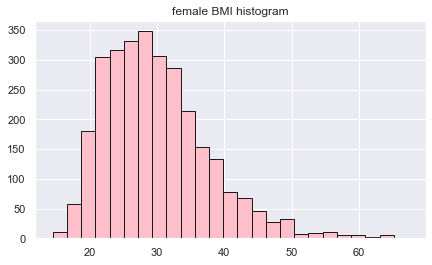

<function matplotlib.pyplot.show(close=None, block=None)>

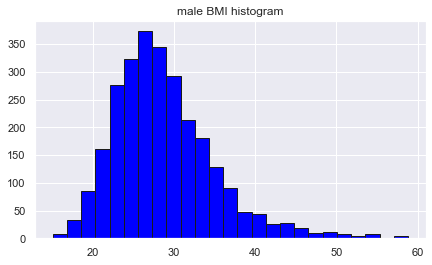

In [16]:
plt.figure(figsize=(7,4))
plt.title("female BMI histogram")
plt.hist(female["BMXBMI"].dropna(), color='pink', bins=25, edgecolor='k')
plt.show()

plt.figure(figsize=(7,4))
plt.title("male BMI histogram")
plt.hist(male["BMXBMI"].dropna(), color='blue', bins=25, edgecolor='k')
plt.show

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats.distributions as dist


df = pd.read_csv('Data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Hypothesis : in Ireland, heart disease is 42%. are more in the US ?

In [18]:
#step 1. define null hypothesis dan alternative hypothesis

In [19]:
#null hypothesis di US adalah kurang atau sama dengan 42%

Ho: po = 0.42 #null hypothesis

Ha: p > 0.42 #alternative hypothesis

In [26]:
#Step 2. Assume dataset is for US people so calculate proportion US people with heart disease

US_sakit = len(df[df["target"]==1])
Total = len(df)

p_US = US_sakit/Total
p_US

0.5131707317073171

In [32]:
#Step 3. Test Statistics (z-score)

Std_error = np.sqrt(0.42 * (1-0.42) / Total)
print("Std_error = ", Std_error)

#Best Estimate
be = p_US

#Hypo estimate
he = 0.42
test_stat = (be - he)/Std_error

print("test stat = ", test_stat)

Std_error =  0.015416177755376521
test stat =  6.04369858636477


In [33]:
#Step 4. Calculate p value
p_value = 2 * dist.norm.cdf(-np.abs(test_stat))
p_value

1.5062078087269162e-09

#Step 5. konklusi dari p-value

Significant level dari alpha adalah 5%

dari sini p-value lebih kecil dari alpha jadi dapat null reject hypothesis

Kesimpuln : terdapat perbedaan proporsi penduduk dengan penyakit jantung di Irlandia dan US

## Statistics Hypothesis Cheat Sheet

## Normality Test
- Shapiro-Wilk Test
- D'Agostino K^2 Test
- Anderson-Darling Test

## Correlation Test
- Pearson Correlation Coefficient
- Spearman's Rank Correlation
- Kendall's Rank Correlation
- Chi-Squared Test

## Stationary Test
- Augmented Dickey-Fueller Unit Root Test
- Kwiatkowski-Phillips-Schmidth-Shin

## Parametric Statistical Hypothesis Test
- Student t-test
- Paired Student t-test
- Analysis of Variance Test (ANOVA)

## NonParametric Statistical Hypothesis Test
- Mann-Whitney U Test
- Wilcoxson Signed-Rank Test
- Kruskal-Wallis H Test
- Friedman Test